In [88]:
# Requiremnt for the project to run
import pandas as pd
from datetime import datetime
from pandas.tseries.offsets import MonthEnd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# Creating election_data DataFrame
file_path = 'C:\\Users\\rafme\\Downloads\\Election_Data_V3.xlsx' # please insert your path here
election_data = pd.read_excel(file_path)

current_year = datetime.now().year
election_data = election_data[election_data['Date'].dt.year >= (current_year - 30)]
# Continue with the rest of the processing on election_data_filtered

# Keep only the relevant columns
election_data = election_data[['Date', 'Country', 'Spectrum', 'Close', 'Party', 'Share', 'Winner']]

# Display the first few rows to verify the changes
print(election_data.head())


In [40]:
# Adding indexes to election_data
index_to_country = {
    '^FTSE': 'UK',
    '^GDAXI': 'Germany',
    'FTSEMIB.MI': 'Italy',
    '^AEX': 'Netherlands',
    '^FCHI': 'France',
    '^IBEX': 'Spain'
}


country_to_index = {country: index for index, country in index_to_country.items()}

election_data['Stock Index'] = election_data['Country'].map(country_to_index)

print(election_data.head())


        Date  Country      Spectrum Close Party  Share  Winner Stock Index
0 2021-09-26  Germany   centre-left   Yes   SPD   25.7  Scholz      ^GDAXI
1 2017-09-24  Germany        centre    No   CDU   32.9  Merkel      ^GDAXI
2 2013-09-22  Germany        centre    No   CDU   41.5  Merkel      ^GDAXI
3 2009-09-27  Germany  centre-right    No   CDU   33.8  Merkel      ^GDAXI
4 2005-09-18  Germany        centre    No   CDU   35.2  Merkel      ^GDAXI


In [41]:
# Filtering election_data for our desired range

def calculate_time_frame(election_date):
    start_date = election_date - pd.DateOffset(months=6)
    end_date = election_date + pd.DateOffset(months=6) + MonthEnd(0)  # Ensure the end date is the end of the month
    return start_date, end_date


election_data['Start Date'], election_data['End Date'] = zip(*election_data['Date'].apply(calculate_time_frame))

print(election_data.head())


        Date  Country      Spectrum Close Party  Share  Winner Stock Index  \
0 2021-09-26  Germany   centre-left   Yes   SPD   25.7  Scholz      ^GDAXI   
1 2017-09-24  Germany        centre    No   CDU   32.9  Merkel      ^GDAXI   
2 2013-09-22  Germany        centre    No   CDU   41.5  Merkel      ^GDAXI   
3 2009-09-27  Germany  centre-right    No   CDU   33.8  Merkel      ^GDAXI   
4 2005-09-18  Germany        centre    No   CDU   35.2  Merkel      ^GDAXI   

  Start Date   End Date  
0 2021-03-26 2022-03-31  
1 2017-03-24 2018-03-31  
2 2013-03-22 2014-03-31  
3 2009-03-27 2010-03-31  
4 2005-03-18 2006-03-31  


In [42]:
# Creating a function in order to create stock_data - filtering only the stocks we need

def fetch_stock_data(ticker, start_date, end_date):
    """
    Fetches historical stock data from Yahoo Finance.

    :param ticker: The stock ticker symbol.
    :param start_date: The start date for the data.
    :param end_date: The end date for the data.
    :return: A DataFrame with the stock data.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data


In [43]:
# Defining a function in order to calculate returns
def calculate_return(stock_data):
    """
    Calculates the return of an investment.

    :param stock_data: A DataFrame with the stock data.
    :return: The return of the investment.
    """
    if not stock_data.empty and 'Adj Close' in stock_data.columns:
        # The return is calculated based on the adjusted closing price
        start_price = stock_data['Adj Close'].iloc[0]
        end_price = stock_data['Adj Close'].iloc[-1]
        return (end_price - start_price) / start_price
    else:
        return None


In [44]:
# Using our functions in order to add to election_data investment plans
election_data['Investment Return'] = None

for index, row in election_data.iterrows():
    stock_index = row['Stock Index']
    start_date = row['Start Date']
    end_date = row['End Date']
    
    if pd.notnull(stock_index):
        stock_data = fetch_stock_data(stock_index, start_date, end_date)
        investment_return = calculate_return(stock_data)
        election_data.at[index, 'Investment Return'] = investment_return

print(election_data)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

         Date  Country      Spectrum Close        Party  Share      Winner  \
0  2021-09-26  Germany   centre-left   Yes          SPD   25.7      Scholz   
1  2017-09-24  Germany        centre    No          CDU   32.9      Merkel   
2  2013-09-22  Germany        centre    No          CDU   41.5      Merkel   
3  2009-09-27  Germany  centre-right    No          CDU   33.8      Merkel   
4  2005-09-18  Germany        centre    No          CDU   35.2      Merkel   
5  2002-09-22  Germany   centre-left   Yes          SPD   38.5   Schroeder   
6  1998-09-27  Germany   centre-left    No          SPD   40.9   Schroeder   
7  1994-10-16  Germany  centre-right   Yes          CDU   41.4        Kohl   
12 2019-12-12       UK  centre-right    No       Tories   43.6     Johnson   
13 2017-06-08       UK  centre-right    No       Tories   42.3         May   
14 2015-05-07       UK  centre-right   Yes       Tories   36.8     Cameron   
15 2010-05-06       UK  centre-right   Yes       Tories   36.1  

In [45]:
# Group by 'Country' and 'Close' and calculate relevant statistics
grouped_stats = election_data.groupby(['Country', 'Close'])['Investment Return'].agg(['mean', 'std', 'count', 'min', 'max'])


grouped_stats.rename(columns={'mean': 'Average Return', 'std': 'Standard Deviation', 'count': 'Number of Elections', 'min': 'Minimum Return', 'max': 'Maximum Return'}, inplace=True)

print(grouped_stats)

              Average Return  Standard Deviation  Number of Elections  \
Country Close                                                           
France  No         -0.019404            0.195731                    4   
        Yes         0.062157            0.124110                    2   
Germany No          0.202832            0.223914                    5   
        Yes        -0.210088            0.280170                    3   
Italy   No         -0.227024            0.313657                    3   
        Yes         0.073865            0.112534                    3   
Spain   No         -0.149145            0.196072                    5   
        Yes         0.048428            0.196109                    5   
UK      No           0.03552            0.180252                    5   
        Yes         0.025079            0.076813                    2   

              Minimum Return Maximum Return  
Country Close                                
France  No         -0.258328   

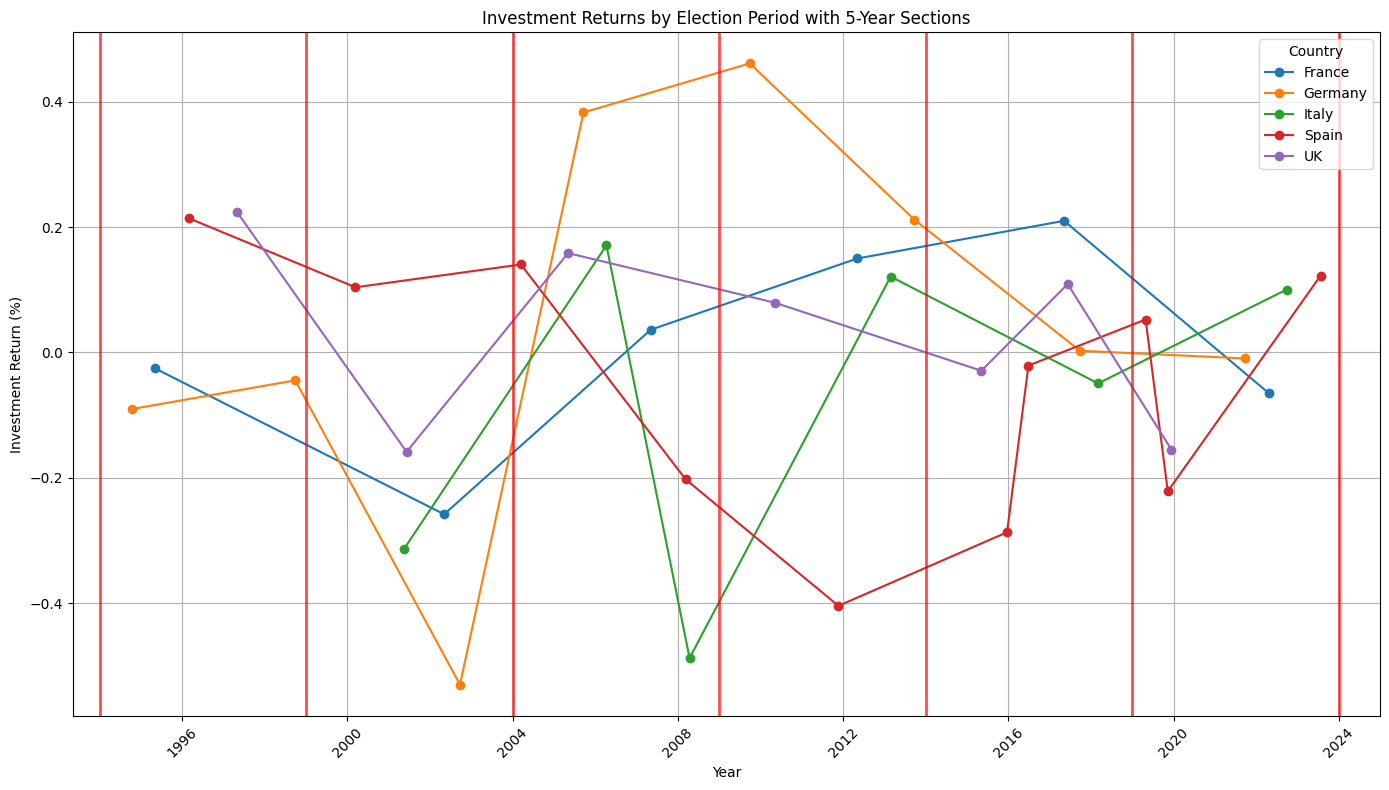

In [46]:

# Visualization : using our DataFrames in order to check our thesis
election_data['Date'] = pd.to_datetime(election_data['Date'])

election_data['Investment Return'] = pd.to_numeric(election_data['Investment Return'], errors='coerce')

# Visualization 1: Investment Returns Over Time with Lines and 5-Year Sections
plt.figure(figsize=(14, 8))
for country in sorted(election_data['Country'].unique()):
    country_data = election_data[election_data['Country'] == country].sort_values('Date')
    plt.plot(country_data['Date'], country_data['Investment Return'], marker='o', linestyle='-', label=country)


start_year = election_data['Date'].dt.year.min()
end_year = election_data['Date'].dt.year.max()

years = np.arange(start_year, end_year + 5, 5)

for year in years:
    plt.axvline(pd.to_datetime(f'{year}-01-01'), color='red', linestyle='-', alpha=0.7, linewidth=2)

plt.xlabel('Year')
plt.ylabel('Investment Return (%)')
plt.title('Investment Returns by Election Period with 5-Year Sections')
plt.legend(title='Country')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()







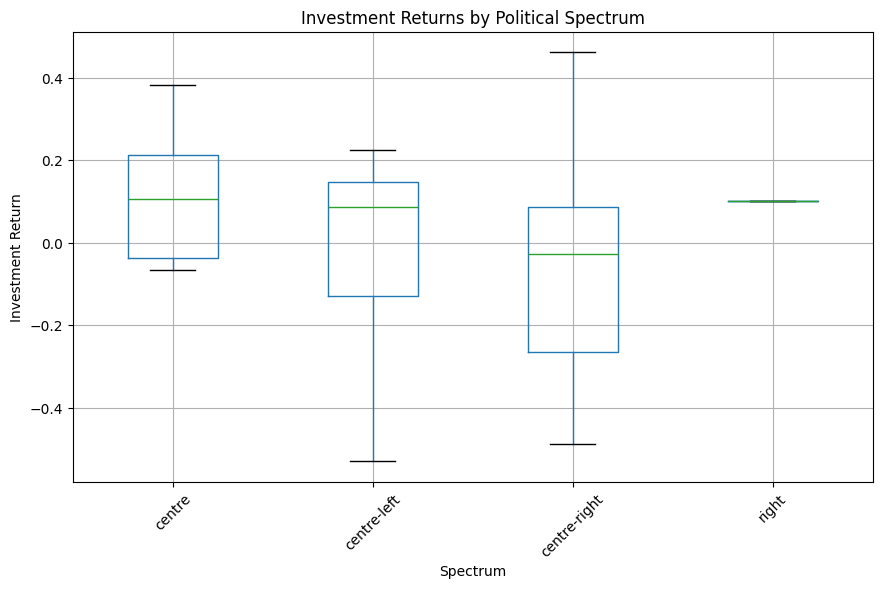

In [47]:
# Visualization 2: Investment Returns by Political Spectrum

election_data.boxplot(by='Spectrum', column='Investment Return', figsize=(10, 6))
plt.xticks(rotation=45)
plt.ylabel('Investment Return')
plt.title('Investment Returns by Political Spectrum')
plt.suptitle('')
plt.show()

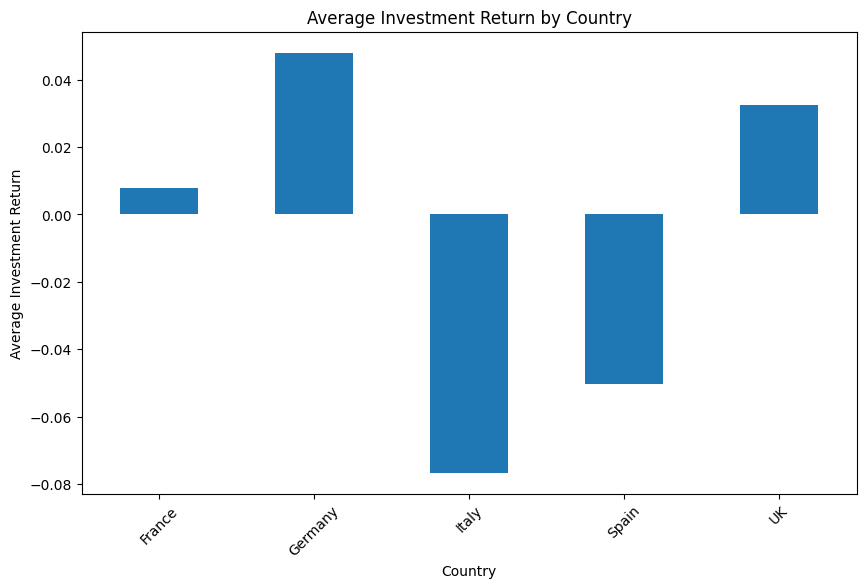

In [48]:
# Visualization 3: Average Investment Return by Country
average_returns = election_data.groupby('Country')['Investment Return'].mean()
average_returns.plot(kind='bar', figsize=(10, 6))
plt.ylabel('Average Investment Return')
plt.title('Average Investment Return by Country')
plt.xticks(rotation=45)
plt.show()


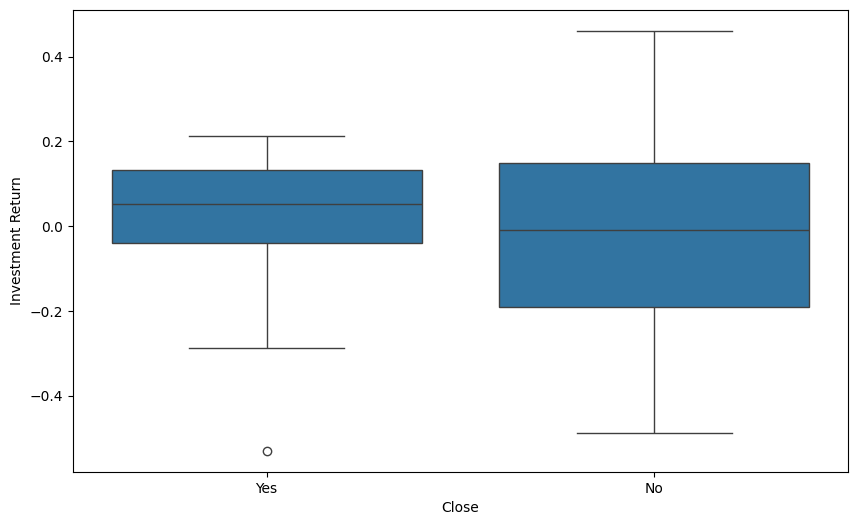

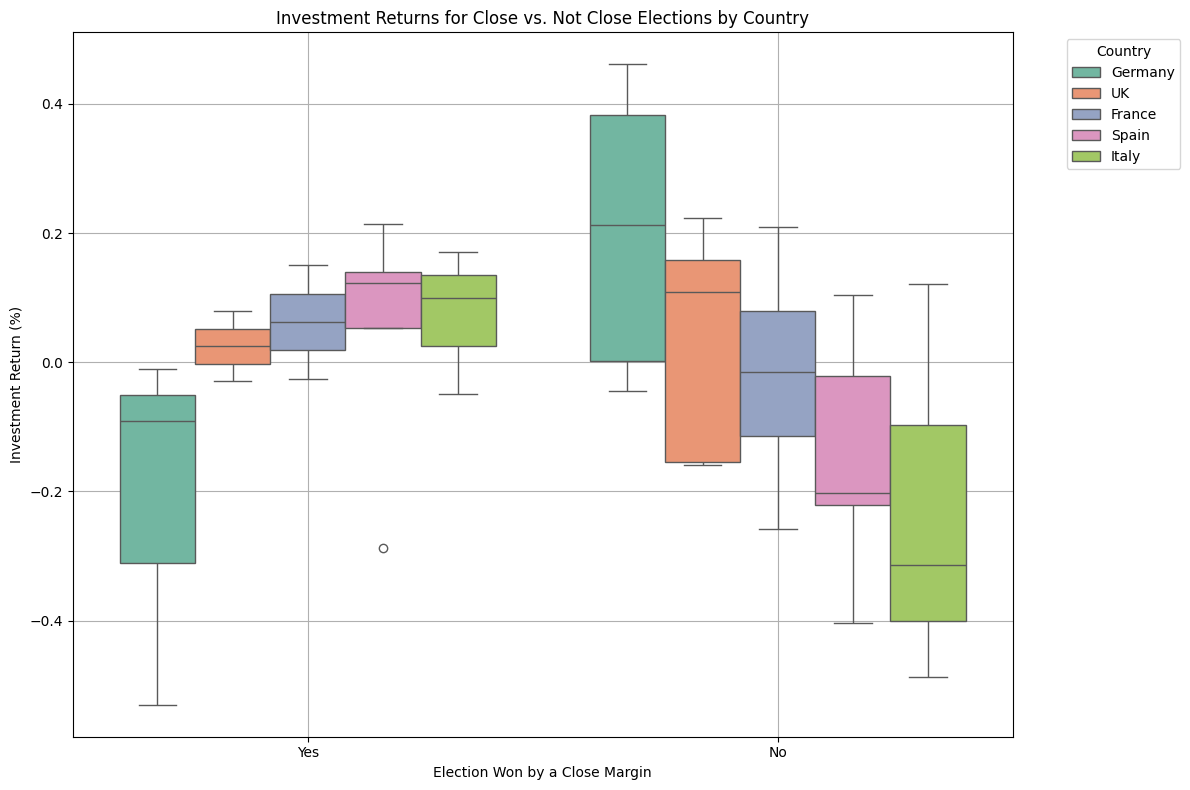

In [49]:
# Visualization 4: Investment Returns for Close vs. Not Close Elections
plt.figure(figsize=(10, 6))
sns.boxplot(x='Close', y='Investment Return', data=election_data)

plt.figure(figsize=(12, 8))
sns.boxplot(x='Close', y='Investment Return', hue='Country', data=election_data, palette="Set2")

plt.title('Investment Returns for Close vs. Not Close Elections by Country')
plt.xlabel('Election Won by a Close Margin')
plt.ylabel('Investment Return (%)')
plt.grid(True)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to make room for the legend
plt.show()

In [51]:
#invesment return DataFrame per country:
grouped_stats = election_data.groupby(['Country', 'Close'])['Investment Return'].agg(['mean', 'std', 'count', 'min', 'max'])

grouped_stats.rename(columns={'mean': 'Average Return', 'std': 'Standard Deviation', 'count': 'Number of Elections', 'min': 'Minimum Return', 'max': 'Maximum Return'}, inplace=True)


print(grouped_stats)


               Average Return  Standard Deviation  Number of Elections  \
Country Close                                                            
France  No          -0.019404            0.195731                    4   
        Yes          0.062157            0.124110                    2   
Germany No           0.202832            0.223914                    5   
        Yes         -0.210088            0.280170                    3   
Italy   No          -0.227024            0.313657                    3   
        Yes          0.073865            0.112534                    3   
Spain   No          -0.149145            0.196072                    5   
        Yes          0.048428            0.196109                    5   
UK      No           0.035520            0.180252                    5   
        Yes          0.025079            0.076813                    2   

               Minimum Return  Maximum Return  
Country Close                                  
France  No     

In [52]:

# Countries we will use
index_to_country = {
    '^FTSE': 'UK',
    '^GDAXI': 'Germany',
    'FTSEMIB.MI': 'Italy',
    '^AEX': 'Netherlands',
    '^FCHI': 'France',
    '^IBEX': 'Spain'
}

# Our project range
start_date = '1990-01-01'
end_date = '2023-01-01'


yearly_returns_df = pd.DataFrame(columns=['Stock Index', 'Country', 'Average Yearly Return'])

for index, country in index_to_country.items():
    print(f"Fetching data for {index} ({country})")
    data = fetch_stock_data(index, start_date, end_date)
    
    if not data.empty:
        # Calculate yearly returns
        data['Year'] = data.index.year
        yearly_returns = data['Adj Close'].resample('Y').last().pct_change()
        avg_yearly_return = yearly_returns.mean()
        
        # Create a DataFrame for the new row
        new_row_df = pd.DataFrame([{
            'Stock Index': index,
            'Country': country,
            'Average Yearly Return': avg_yearly_return
        }])
        
        # Use pd.concat to append the new row
        yearly_returns_df = pd.concat([yearly_returns_df, new_row_df], ignore_index=True)

print(yearly_returns_df)


[*********************100%%**********************]  1 of 1 completed
C:\Users\rafme\AppData\Local\Temp\ipykernel_34752\3521339909.py:37: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  yearly_returns_df = pd.concat([yearly_returns_df, new_row_df], ignore_index=True)
[*********************100%%**********************]  1 of 1 completed

Fetching data for ^FTSE (UK)
Fetching data for ^GDAXI (Germany)
Fetching data for FTSEMIB.MI (Italy)



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Fetching data for ^AEX (Netherlands)
Fetching data for ^FCHI (France)
Fetching data for ^IBEX (Spain)
  Stock Index      Country  Average Yearly Return
0       ^FTSE           UK               0.050057
1      ^GDAXI      Germany               0.099899
2  FTSEMIB.MI        Italy               0.022901
3        ^AEX  Netherlands               0.082529
4       ^FCHI       France               0.067065
5       ^IBEX        Spain               0.050724


In [53]:
# Calculate the average return for election years per country
avg_election_year_returns_df = election_data.groupby('Country')['Investment Return'].mean().reset_index()


avg_election_year_returns_df.columns = ['Country', 'Election Year Avg Return']
print(avg_election_year_returns_df.head(10))


   Country  Election Year Avg Return
0   France                  0.007783
1  Germany                  0.047987
2    Italy                 -0.076579
3    Spain                 -0.050358
4       UK                  0.032537


In [54]:
yearly_returns_df

,Stock Index,Country,Average Yearly Return
0,^FTSE,UK,0.050057
1,^GDAXI,Germany,0.099899
2,FTSEMIB.MI,Italy,0.022901
3,^AEX,Netherlands,0.082529
4,^FCHI,France,0.067065
5,^IBEX,Spain,0.050724


In [79]:
# Merging the DataFrames on 'Country'
comparison_df = pd.merge(
    avg_election_year_returns_df[['Country', 'Election Year Avg Return']],
    yearly_returns_df[['Country', 'Average Yearly Return']],
    on='Country'
)

print(comparison_df)

   Country  Election Year Avg Return  Average Yearly Return
0   France                  0.007783               0.067065
1  Germany                  0.047987               0.099899
2    Italy                 -0.076579               0.022901
3    Spain                 -0.050358               0.050724
4       UK                  0.032537               0.050057


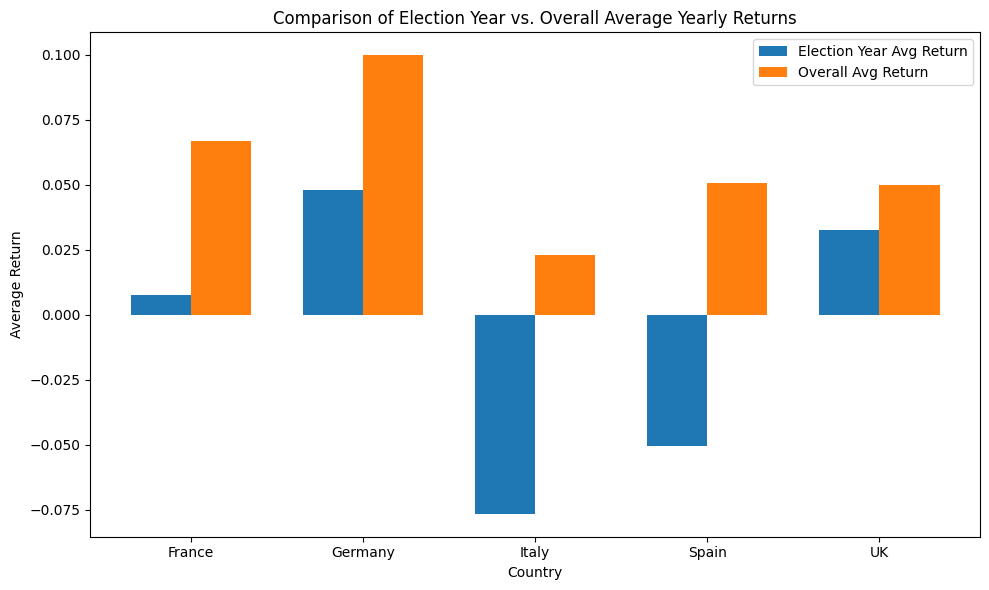

In [87]:


# Visualization 5: Comparison of Election Year vs. Overall Average Yearly Returns
pos = np.arange(len(comparison_df['Country']))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))


plt.bar(pos - width/2, comparison_df['Election Year Avg Return'], width, label='Election Year Avg Return')
plt.bar(pos + width/2, comparison_df['Average Yearly Return'], width, label='Overall Avg Return')


plt.xlabel('Country')
plt.ylabel('Average Return')
plt.title('Comparison of Election Year vs. Overall Average Yearly Returns')
plt.xticks(pos, comparison_df['Country'])
plt.legend()
plt.tight_layout()


plt.show()


In [85]:
# Main function: using all of our data in order to help the user make predictions for his invesment plans
def predict_investment_return(country, historical_data):
    """
    Predicts whether to invest in a market based on the country, election year status, political spectrum, and historical data.

    :param country: The country to predict for.
    :param historical_data: DataFrame containing historical average returns.
    :return: Prediction and expected return.
    :input: The user puts the country he want to invest in and then gives his preditcion
    """
    # Check if the country exists in the data
    if country not in historical_data['Country'].values:
        return "Wrong input - please put a relevant country", None

    # Filter the historical data for the given country
    country_data = historical_data[historical_data['Country'] == country]

    is_election_year = input("Is it an election year? (yes/no): ").lower() == 'yes'
    
    adjustment_factor = 0 
    
    # if statment for political spectrum
    if is_election_year:
        political_spectrum = input("Which political spectrum do you think will win the election? (left/centre/right): ").lower()
        if political_spectrum == 'centre':
            adjustment_factor = 0.05
        elif political_spectrum == 'left':
            adjustment_factor = 0.02
        elif political_spectrum == 'right':
            adjustment_factor = -0.02
        else:
            return "Wrong input - please choose a valid political spectrum (left/centre/right)", None
            
        avg_return = country_data['Election Year Avg Return'].iloc[0] + adjustment_factor
    else:
        avg_return = country_data['Average Yearly Return'].iloc[0]

    
    formatted_return = "{:.2%}".format(avg_return).lstrip('0')
    
    # Construct the advice message based on the return
    if avg_return < 0:
        advice = f"It's an election year, and based on a {political_spectrum} win, the adjusted expected return suggests you might consider shorting the market. Expected Return: {formatted_return}"
    else:
        advice = f"It's an election year, and based on a {political_spectrum} win, the adjusted expected return is {formatted_return}."

    return advice, avg_return

# usage
user_country = input("Enter the country: ") 
advice, expected_return = predict_investment_return(user_country, comparison_df)

print(advice)


It's an election year, and based on a left win, the adjusted expected return is 2.78%.
